In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Over-determined | over-constrained

#### Kriteria solusi: misfit minimum
### E = $e^Te = [d-Gm]^T [d-Gm]$

In [2]:
# parameter model
a = 1
b = 2
m_obs = [a,b]

# variabel bebas
x = np.arange(1,11)

# d observasi sintetik
d_obs = a + (b*x)

# menambahkan noise
np.random.seed(10)
noise = np.random.uniform(-1, 1,len(x))
d_obs = d_obs+noise

# membuat outlier
d_obs[0] = d_obs[0]+10
#d_obs[1] = d_obs[1]+15
#d_obs[2] = d_obs[2]+15

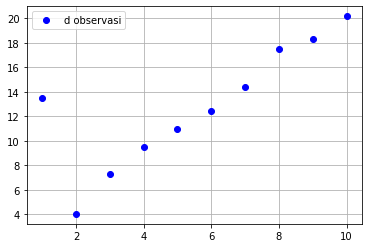

In [3]:
# plot d observasi dengan noise
plt.plot(x, d_obs, "bo", label="d observasi")
plt.grid()
plt.legend()
plt.show()

### Solusi inversi
### $m = [G^TG]^{-1}G^Td$

In [4]:
# matriks kernel
G = np.column_stack([x**0,x])

# inversi
m_calc = (np.linalg.inv(np.transpose(G).dot(G)).dot(np.transpose(G))).dot(d_obs)
m_calc

array([5.24943027, 1.37697168])

In [5]:
# d kalkulasi
d_calc = m_calc[0] + (m_calc[1]*x)

# menghitung eror
E = np.transpose(d_obs - (G.dot(m_calc))).dot(d_obs - (G.dot(m_calc)))
E

75.64686088482557

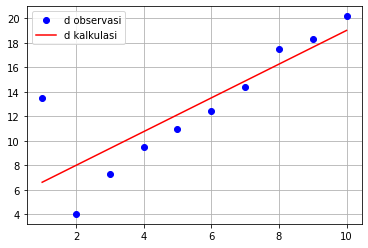

In [6]:
# plot
plt.plot(x, d_obs, "bo", label="d observasi")
plt.plot(x, d_calc, 'r-', label="d kalkulasi")
plt.grid()
plt.legend()
plt.show()

### Solusi dengan model referensi
### $m = m_{ref} + [G^TG + ε^2I]^{-1}G^T[d-Gm_{ref}]$

In [7]:
# model referensi
m_ref = np.array([1, 2])

# Menghitung matriks epsilon^2I
epsilon = 50
eI = epsilon * np.identity(len(m_ref))

# inversi
m_ref_calc = m_ref + (np.linalg.inv((np.transpose(G).dot(G) + eI)).dot(np.transpose(G)).dot(d_obs - G.dot(m_ref)))
m_ref_calc

array([1.16975806, 1.96440476])

In [8]:
# d kalkulasi dengan model referensi
d_calc_ref = m_ref_calc[0] + (m_ref_calc[1]*x)

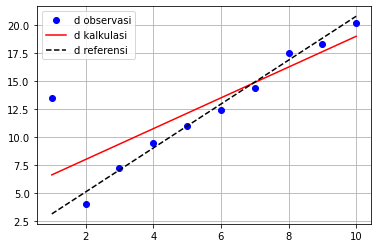

In [9]:
# plot
plt.plot(x, d_obs, "bo", label="d observasi")
plt.plot(x, d_calc, 'r-', label="d kalkulasi")
plt.plot(x, d_calc_ref, "k--", label="d referensi")
plt.grid()
plt.legend()
plt.show()